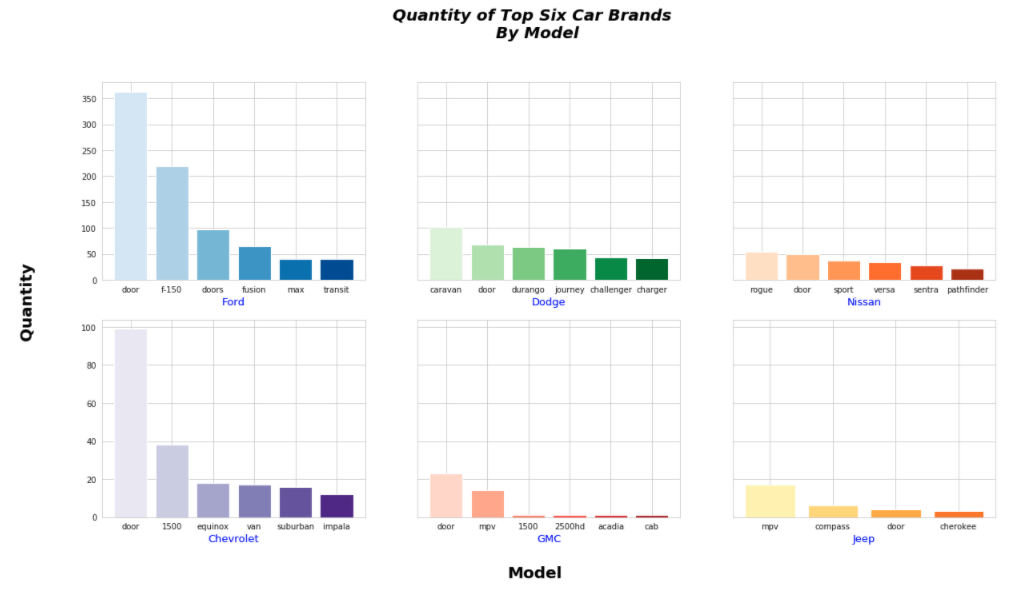

# 1. Exploratory Data Analysis

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
cars = pd.read_csv('/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv')
cars.head()

In [ ]:
# the second column is an index and can be deleted
# the vin number is a unique value for each car and wont add to analysis. also delete 
# same with lot number and condition

In [ ]:
cars.drop(['Unnamed: 0','vin','lot','condition'],axis=1,inplace=True)
cars.head()

In [ ]:
cars.info()

In [ ]:
cars.isnull().sum()
# no null values, great! 

In [ ]:
cars.describe()

In [ ]:
cars['title_status'].unique()

In [ ]:
cars[cars['brand']=='dodge']['model'].nunique()

In [ ]:
# this is using matplotlib
sns.set_style('whitegrid')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

ax1.scatter(x='mileage',y='price',data=cars,marker='.',facecolor='r',edgecolors='white',linewidth=.5)
#scatter1.set_title('Price vs Mileage')

ax2.scatter(x='year',y='price',data=cars,marker='.',facecolor='b',edgecolors='white',linewidth=.5,s=80)

ax1.set_title('Price vs Mileage',fontsize=15,fontweight="bold",color='blue')
ax1.set_ylabel('Price',fontsize=15,color='b')
ax1.set_xlabel('Mileage',fontsize=13,color='b')

ax2.set_title('Price vs Year',fontsize=15,fontweight="bold",color='blue')
ax2.set_ylabel('Price',fontsize=15,color='b')
ax2.set_xlabel('Year',fontsize=15,color='b')

In [ ]:
scat1 = sns.scatterplot(y='price',x='mileage',data=cars,hue='title_status',marker='o')

In [ ]:
plt.figure(figsize=(8,8))
box_cars = sns.boxplot(x='title_status',y='price',data=cars,showfliers=False)
box_cars.set_title('Price by Title_Status',fontsize=15,fontweight='bold',color='Blue')
box_cars.set_xlabel('Title Status',fontsize=15,color='Blue')
box_cars.set_ylabel('Price',fontsize=15,color='Blue')

In [ ]:

plt.figure(figsize=(9,6))
price_dist = plt.hist(x='price',data=cars,bins=30,color='g',alpha=.5)
plt.title('Price Distribution',fontsize=15,color='blue',fontweight='bold')
plt.xlabel('Price',fontsize=14,color='blue')
plt.ylabel('Quantity',fontsize=14,color='blue')

In [ ]:
by_title_status = cars.groupby('title_status').agg(['count'])
by_title_status

In [ ]:
by_title_status.index

In [ ]:
by_title_status['price']['count']

In [ ]:
plt.bar(x=by_title_status.index,height=by_title_status['price']['count'],color='g',alpha=.5)
plt.title('Distribution by Title Status',fontsize=15,color='blue')
plt.xlabel('Title Status',fontsize=14,color='blue')
plt.ylabel('Count',fontsize=14,color='blue')
plt.ylim(0,2500)

In [ ]:
cars['brand'].unique()

In [ ]:
cars[cars['brand']=='peterbilt']['model'].unique()

In [ ]:
by_model = cars.groupby(['brand','model']).agg(['count'])
by_model

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(x=by_title_status.index,height=by_title_status['price']['count'],color=sns.color_palette('dark'),alpha=.6,width=.4,align='center')
plt.title('Distribution by Title Status',fontsize=15,color='blue')
plt.xlabel('Title Status',fontsize=14,color='blue')
plt.ylabel('Count',fontsize=14,color='blue')
plt.ylim(0,2500)

In [ ]:
car_brands= cars.groupby('brand').agg(['count'])
car_brands

In [ ]:
sorted_cars = car_brands.sort_values(by=[('price','count')],ascending=False)
top_six = sorted_cars[0:6]
top_six

In [ ]:
car_brands_index = car_brands.index

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=top_six.index,height=top_six['price']['count'],alpha=.6,color=sns.color_palette('dark'))
plt.ylim(0,1500)
plt.title('Top Six Car Brands',fontsize=15,fontweight='bold',color='b')
plt.xlabel('Car Brand',fontsize=13,color='b')
plt.ylabel('Quantity',fontsize=13,color='b')

In [ ]:
# most popular models within the six brands

#by_model = cars.groupby(['brand','model']).agg(['count'])
#by_model


In [ ]:
cars[cars['brand']=='ford']['model'].unique()

In [ ]:
by_model

In [ ]:
cars[cars['brand']=='ford']

In [ ]:
s = cars.groupby(['brand']).agg(['count'])
s

In [ ]:
# brands = [['ford','dodge','nissan','chevrolet','gmc','jeep']]
pd.pivot_table(cars,index=['brand','model'],aggfunc=np.sum)

In [ ]:
f = pd.pivot_table(cars[cars['brand']=='ford'],index=['brand','model'],aggfunc='count').sort_values(by='color',ascending=False)[0:6]

d = pd.pivot_table(cars[cars['brand']=='dodge'],index=['brand','model'],aggfunc='count').sort_values(by='color',ascending=False)[0:6]

n = pd.pivot_table(cars[cars['brand']=='nissan'],index=['brand','model'],aggfunc='count').sort_values(by='color',ascending=False)[0:6]

c = pd.pivot_table(cars[cars['brand']=='chevrolet'],index=['brand','model'],aggfunc='count').sort_values(by='color',ascending=False)[0:6]

g = pd.pivot_table(cars[cars['brand']=='gmc'],index=['brand','model'],aggfunc='count').sort_values(by='color',ascending=False)[0:6]

j = pd.pivot_table(cars[cars['brand']=='jeep'],index=['brand','model'],aggfunc='count').sort_values(by='color',ascending=False)[0:6]




In [ ]:
# check one of them to confirm output is what we want
f

In [ ]:
sns.set_style('whitegrid')
sns.color_palette('dark')
fig, (axs) = plt.subplots(2,3,figsize=(20,10),sharey='row')
fig.suptitle("Quantity of Top Six Car Brands \n By Model",va='center',ha='center',fontsize=20,fontweight='heavy',fontstyle='oblique',color='k')

axs[0,0].bar(x=f.index.get_level_values(1),height=f['color'].values,color=sns.color_palette('Blues'),alpha=1)
axs[0,1].bar(x=d.index.get_level_values(1),height=d['color'].values,color=sns.color_palette('Greens'),alpha=1)
axs[0,2].bar(x=n.index.get_level_values(1),height=n['color'].values,color=sns.color_palette('Oranges'),alpha=1)
axs[1,0].bar(x=c.index.get_level_values(1),height=c['color'].values,color=sns.color_palette('Purples'),alpha=1)
axs[1,1].bar(x=g.index.get_level_values(1),height=g['color'].values,color=sns.color_palette('Reds'),alpha=1)
axs[1,2].bar(x=j.index.get_level_values(1),height=j['color'].values,color=sns.color_palette('YlOrBr'),alpha=1)

# Set axis labels for the entire plot
fig.text(0.5, 0.04, 'Model', ha='center', va='top',fontsize=20,fontweight='heavy',color='k')
fig.text(0.06, 0.5, 'Quantity', ha='center', va='center', rotation='vertical',fontsize=20,fontweight='bold',color='k')

#set axis labels for individual plots
axs[0,0].set_xlabel('Ford',fontsize=13,color='b')
axs[0,1].set_xlabel('Dodge',fontsize=13,color='b')
axs[0,2].set_xlabel('Nissan',fontsize=13,color='b')
axs[1,0].set_xlabel('Chevrolet',fontsize=13,color='b')
axs[1,1].set_xlabel('GMC',fontsize=13,color='b')
axs[1,2].set_xlabel('Jeep',fontsize=13,color='b')


# # 2.1 *Predictive Modeling with Linear Regression*
### Predicting price using linear regression

In [ ]:
cars.head(10)

In [ ]:
cars['brand'].nunique()

### Transform non-numeric columns into variables that the model can work with. This includes:
* Brand - dummy variables
* Model - dummy variables
* Title_status - binary dummy variables
* Color - dummy variables
* State
* Country DELETE The majority of the data set is from the U.S with less then 20 variables from Canada. 

In [ ]:
cars.drop(['country'],axis=1,inplace=True)
cars.head()

In [ ]:
car_brand=pd.get_dummies(cars['brand'],drop_first=True)
car_model=pd.get_dummies(cars['model'],drop_first=True)
title=pd.get_dummies(cars['title_status'],drop_first=True)
color_=pd.get_dummies(cars['color'],drop_first=True)
state_=pd.get_dummies(cars['state'],drop_first=True)
#cars_model = pd.concat([car_brand,car_model,title,color_],axis=1)
cars_model = pd.concat([cars,car_brand,car_model,title,color_,state_],axis=1)

In [ ]:
list(cars_model.columns)

In [ ]:
cars_model.drop(['brand','model','title_status','color','state'],axis=1,inplace=True)

In [ ]:
X = cars_model.drop(['price'],axis=1)
y = cars_model['price']

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Create and Train the Model

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

### Model Evaluation

In [ ]:
print(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

### Predictions from our model

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
# this is using matplotlib
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
plt.scatter(y_test,predictions,marker='.',c='red',edgecolors='black',s=100,linewidth=1)


In [ ]:
sns.set_style('white')
plt.figure(figsize=(8,8))
sns.distplot((y_test-predictions),bins=50);

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# 2.2 Predictive Modeling with Logistic Regression

# Training and Predicting
### Using Logistic Regression, let's evaluate how predictly we can predict a car's title status

In [ ]:
list(cars_model.columns)

In [ ]:
X = cars_model.drop(['salvage insurance'],axis=1)
y = cars_model['salvage insurance']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

# 3. Conclusion
### Linear Regression left much to be desired for accuracy. Part of the large RMSE and lack of general accuracy may be fixed or adjusted by changing the handling of dummy variables.
### Future updates to this notebook may include any or more of the following:
* Consolidating the state information into one of our areas across the country, North East, North West, South East, South West
* Consolidating colors (for example, there were many kinds of black or white, for example), or perhaps certain colors stand out more than others, maybe a binary whether a car is black or not


### Regarding the ability to predict a car's title status, logistic regression was quite accurate at 97%. 